In [17]:
import numpy as np
import matplotlib.pyplot as plt
T_aire=17.5 #°C
z=np.array([0, 0.5,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,10.3,11.3,13.74])
V=np.array([0, 7.1,7.6,7.7,7.8,8.1,7.9,7.8,7.6,7.5,7.3,7.2,6.8, 0])


RPM=10153/2
V_in=21.998
I_in=2.9

P_in=65

#Presiones
#Cabezas
H1=-6.5*2e-3
H2=-6*2e-3
H3=-5*2e-3
P_atm=75e3
R=287.05 #J/(kg*K)
T=273.15+T_aire #K
v_air=R*T/P_atm #m3/kg
rho_air=1/v_air #kg/m3
rho_alcohol=789 #kg/m3
g=9.81 #m/s2

#Presiones en los agujeros 1 2 y 3
P1=H1*rho_alcohol*g+P_atm   #inicio seccion prueba
P2=H2*rho_alcohol*g+P_atm   #fin seccion prueba-base del difusor
P3=H3*rho_alcohol*g+P_atm   #succion del ventilador

#Diferenciales
H1_2=0.5*2e-3
H1_3=3*2e-3
H2_3=1.5*2e-3

P1_2=H1_2*rho_alcohol*g
P2_3=H2_3*rho_alcohol*g
P1_3=H1_3*rho_alcohol*g


In [27]:
print('P1',format(P1/1000,'.2f'),'kPa')
print('P2',format(P2/1000,'.2f'),'kPa')
print('P3',format(P3/1000,'.2f'),'kPa')
print('P1_2',format(P1_2,'.2f'),'Pa')
print('P2_3',format(P2_3,'.2f'),'Pa')
print('P1_3',format(P1_3,'.2f'),'Pa')
print('Incertidumbre',format(1e-5*rho_alcohol*g,'.2f'),'Pa')

P1 74.90 kPa
P2 74.91 kPa
P3 74.92 kPa
P1_2 7.74 Pa
P2_3 23.22 Pa
P1_3 46.44 Pa
Incertidumbre 0.08 Pa


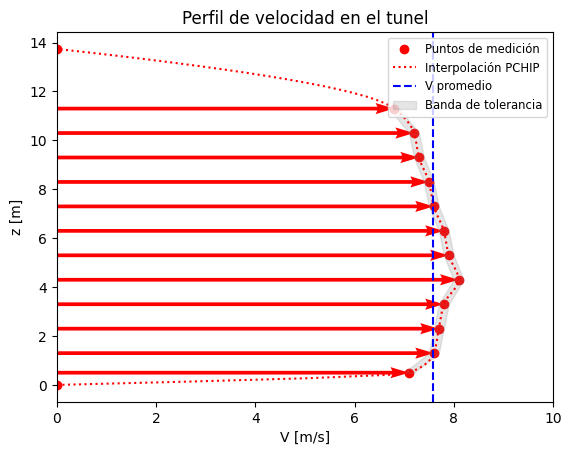

In [6]:
from scipy.interpolate import PchipInterpolator
V_prom=np.trapezoid(V[1:-1], z[1:-1])/(max(z[1:-1])-min(z[1:-1]))
tolerance=0.1 #m/s
V_upper = V + tolerance
V_lower = V - tolerance
z_x = np.linspace(0, 13.74, 100) # Interpolated z values
V_interp = PchipInterpolator(z, V)(z_x) # Interpolated V values
# Plotting data points
plt.scatter(V, z,color="red",label='Puntos de medición')
plt.plot(V_interp, z_x, 'r:', label='Interpolación PCHIP')
plt.axvline(x=V_prom, color='b', linestyle='--', label='V promedio')
# Plotting vectors from y-axis to each point
for i in range(len(V)):
    plt.quiver(0, z[i], V[i], 0, angles='xy', scale_units='xy', scale=1, color='r')
# Plotting tolerance bands
plt.fill_betweenx(z[1:-1], V_lower[1:-1], V_upper[1:-1], color='gray', alpha=0.2, label='Banda de tolerancia')
plt.ylabel('z [m]')
plt.xlabel('V [m/s]')
plt.title('Perfil de velocidad en el tunel')
plt.legend(loc='upper right', fontsize='small')
plt.xlim(0, 10)
plt.show()

In [10]:
A_t=13.7e-2**2
m_dot=rho_air*V_prom*A_t

A_helice=np.pi*(10*25.4e-3)**2/4
V_helice=V_prom*(A_t/A_helice)
print('A_t',format(A_t,'.2f'),'m2')
print('rho_air',format(rho_air,'.2f'),'kg/m3')
print('V_prom',format(V_prom,'.2f'),'m/s')
print('A_helice',format(A_helice,'.2f'),'m2')
print('V_helice',format(V_helice,'.2f'),'m/s')
print('m_dot',format(m_dot,'.2f'),'kg/s')

F_Rdp=-P3*A_helice
F_Rmv=V_helice*m_dot
F_R=F_Rdp+F_Rmv
print('F_R dp',format(F_Rdp,'.2f'),'N')
print('F_R mv',format(F_Rmv,'.2f'),'N')
print('F_R',format(F_R,'.2f'),'N')

A_t 0.02 m2
rho_air 0.90 kg/m3
V_prom 7.59 m/s
A_helice 0.05 m2
V_helice 2.81 m/s
m_dot 0.13 kg/s
F_R dp 121.66 N
F_R mv 0.36 N
F_R 122.02 N


In [8]:
V_0=np.sqrt(V_helice**2-(2*P3/rho_air))
print('V_0',format(V_0,'.2f'),'m/s')
P_helice=P_in-5
T=P_helice/(RPM*np.pi)
print('P_helice',format(P_helice,'.2f'),'W')
print('T',format(T,'.2e'),'N.m')

V_0 73.14 m/s
P_helice 60.00 W
T 3.76e-03 N.m
